# Segmentation with clear and with noisy background 

From an analysis perspective: a "good" image may be processed to extract the object of interest;while a "bad" image makes it difficult or impossible to adequately delineate the objects of interest in the image.

Characteristics of a "good" image include:

1. Large contrast between the flocs and the background.
2. Low number of objects in the field-of-view.     
3. Sufficient number of "in-flocs" flocs during the course of the settling experiment.

A "crowded" image contains too many objects. If there are many touching and out-of-focus objects, the image will be more difficult to segment. 

## Import modules and data

Import **safas**  and other components for display and analysis. **safas** has several example images in the safas/data directory. These images are accessible as attributes of the data module because the __init__ function of safas/data also acts as a loader.   

In [2]:
import sys
from matplotlib import pyplot as plt

%matplotlib inline

import cv2

from safas import filters
from safas import data
from safas.filters.sobel_focus import imfilter as sobel_filter
from safas.filters.imfilters_module import add_contours

## Segmentation comparison
Here is an example of a "good" floc with a "clear" background, and a "good" floc with a "noisy" background. The floc in the clear background may be easily segmented with a simple threshold operator; whereas in the image with a noisy background the threshold mistakenly segments part of the background along with the floc. 

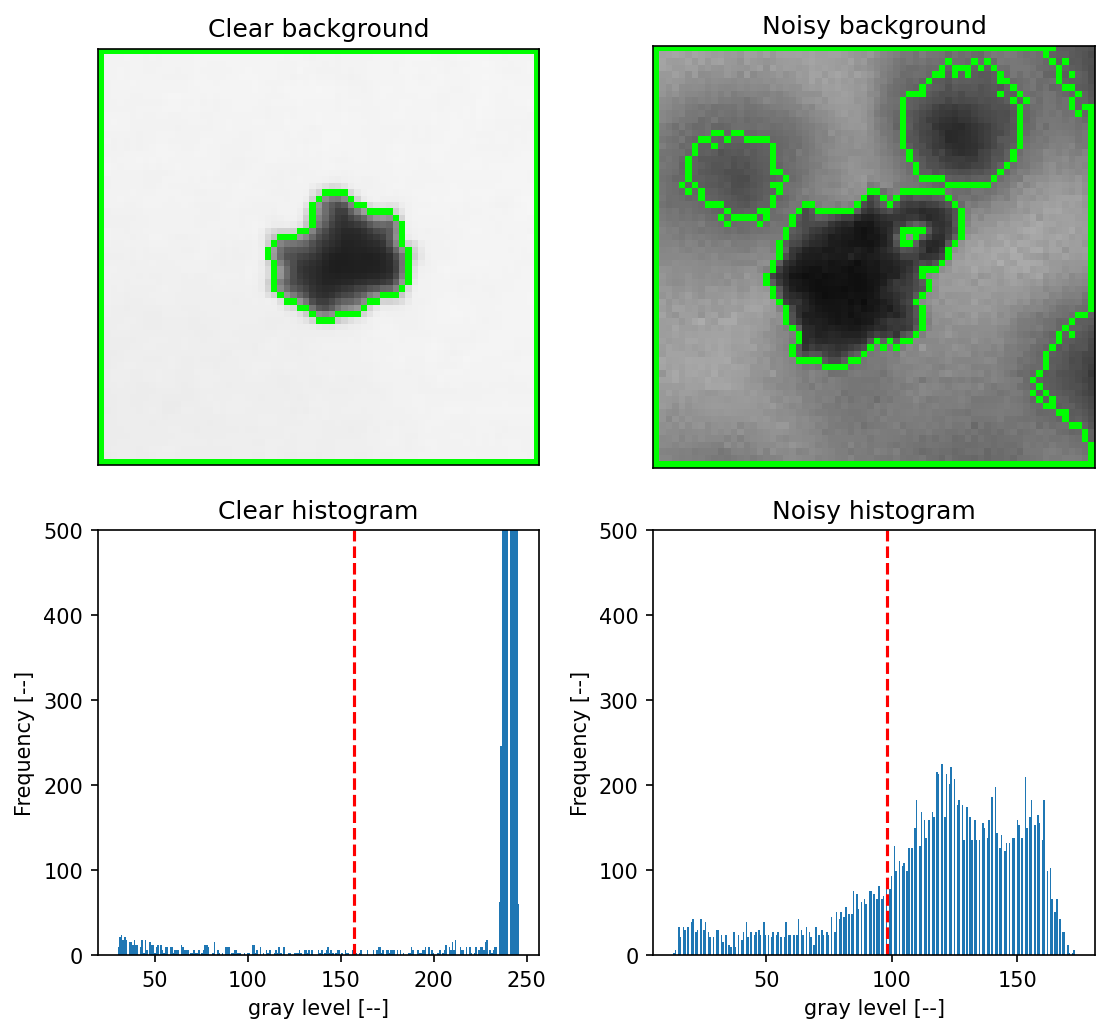

In [3]:
# load images from the safas/data module 
clear = data.clearfloc() 
noisy = data.noisyfloc() 

# convert to grayscale, apply Otsu's binarization, add contours at the threshold
clear_g = cv2.cvtColor(clear.copy(), cv2.COLOR_BGR2GRAY)
ret_clear, clear_th = cv2.threshold(clear_g,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
clear_cont = add_contours(clear.copy(), clear_th, [0,255,0])

noisy_g = cv2.cvtColor(noisy.copy(), cv2.COLOR_BGR2GRAY)
ret_noisy, noisy_th = cv2.threshold(noisy_g,0, 255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
noisy_cont = add_contours(noisy.copy(), noisy_th, [0,255,0])

# plot the images and their gray level intensity histograms
f, ax  = plt.subplots(2, 2, dpi=150, figsize=(7.5, 7))
ax = ax.ravel()

for a in [ax[0], ax[1]]: 
    a.set_xticks([])
    a.set_yticks([])

for a in [ax[2], ax[3]]:
    a.set_xlabel('gray level [--]')
    a.set_ylabel('Frequency [--]')
    a.set_ylim(0,500)

ax[0].imshow(clear_cont)
ax[0].set_title('Clear background')

ax[1].imshow(noisy_cont)
ax[1].set_title('Noisy background')

ax[2].hist(clear.ravel(), bins=255)
ax[2].axvline(ret_clear, linestyle='--', color='r')
ax[2].set_title('Clear histogram')

ax[3].hist(noisy.ravel(), bins=255)
ax[3].axvline(ret_noisy, linestyle='--', color='r')
ax[3].set_title('Noisy histogram')

plt.tight_layout()

save = False

if save: 
    plt.savefig('png/clear_noisy.png', dpi=900)